In [60]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START,  END 

In [61]:
class AgentState(TypedDict):
    number1: int
    operation: str
    number2: int
    finalNumber: int

In [62]:
def adder(state: AgentState)-> AgentState:
    '''This node adds the 2 numbers'''
    state['finalNumber']= state['number1']+ state['number2']
    return state

In [63]:
def subtractor(state: AgentState)-> AgentState:
    '''This node subtracts the 2 numbers'''
    state['finalNumber']= state['number1']- state['number2']
    return state

In [64]:
def decide_node(state: AgentState)-> AgentState:
    if state['operation']=="+":
        return "addition_operator"
    elif state['operation']=="-":
        return "subtraction_operation"

In [65]:
graph= StateGraph(AgentState)
graph.add_node("adder", adder)
graph.add_node("subtractor", subtractor)
graph.add_node("router", lambda state: state  ) # why lamda? coz we are just comparing above not assigning anything.

In [66]:
graph.add_edge(START, "router")
graph.add_conditional_edges(
    "router",
    decide_node, #action it needs to perform
    {
        #edge, node
        "addition_operator": "adder", 
        "subtraction_operation": "subtractor"
    }
    
)


In [67]:
graph.add_edge("adder", END)
graph.add_edge("subtractor", END)

In [68]:
app=graph.compile()

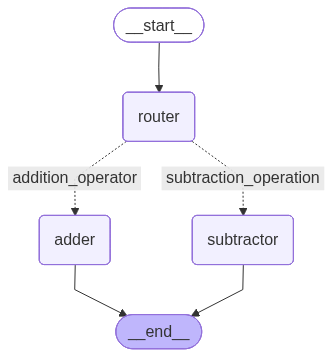

In [69]:
from IPython.display import Image, display
display(Image(app.get_graph(). draw_mermaid_png()))

In [70]:
initial_state = {"number1": 10, "operation": "-", "number2": 8}
print(app.invoke(initial_state))


{'number1': 10, 'operation': '-', 'number2': 8, 'finalNumber': 2}
